<h1 style = 'color:red'><b>Week-14, EDA Assignment - 2</b><h1>

Name - Gorachanda Dash <br>
Date - 25-Mar-2023<br>
Week-14, EDA Assignment - 2

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

> Flight Price:

<p style=" color : #4233FF"><b>Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?</b></p>

In [2]:
df=pd.read_excel(r"D:\DataBox\pw\flight_price.xlsx")
df.shape

(10683, 11)

10683 rows

11 columns

<p style=" color : #4233FF"><b>Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.</b>
</p>

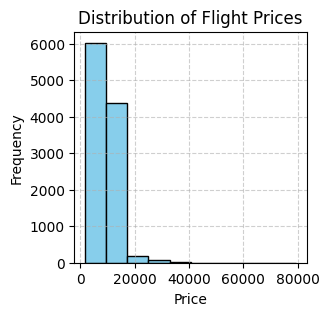

In [3]:
flight_prices = df['Price']

# Create a histogram
plt.figure(figsize=(3, 3))
plt.hist(flight_prices, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<p style=" color : #4233FF"><b>Q3. What is the range of prices in the dataset? What is the minimum and maximum price?</b></p>

In [4]:
# Assuming your dataset is named 'df' and the price column is named 'Price'
flight_prices = df['Price']

# Calculate the minimum and maximum prices
min_price = flight_prices.min()
max_price = flight_prices.max()

# Calculate the price range
price_range = max_price - min_price

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Price Range: {price_range}")


Minimum Price: 1759
Maximum Price: 79512
Price Range: 77753


In [5]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

<p style=" color : #4233FF"><b>Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.</b></p>

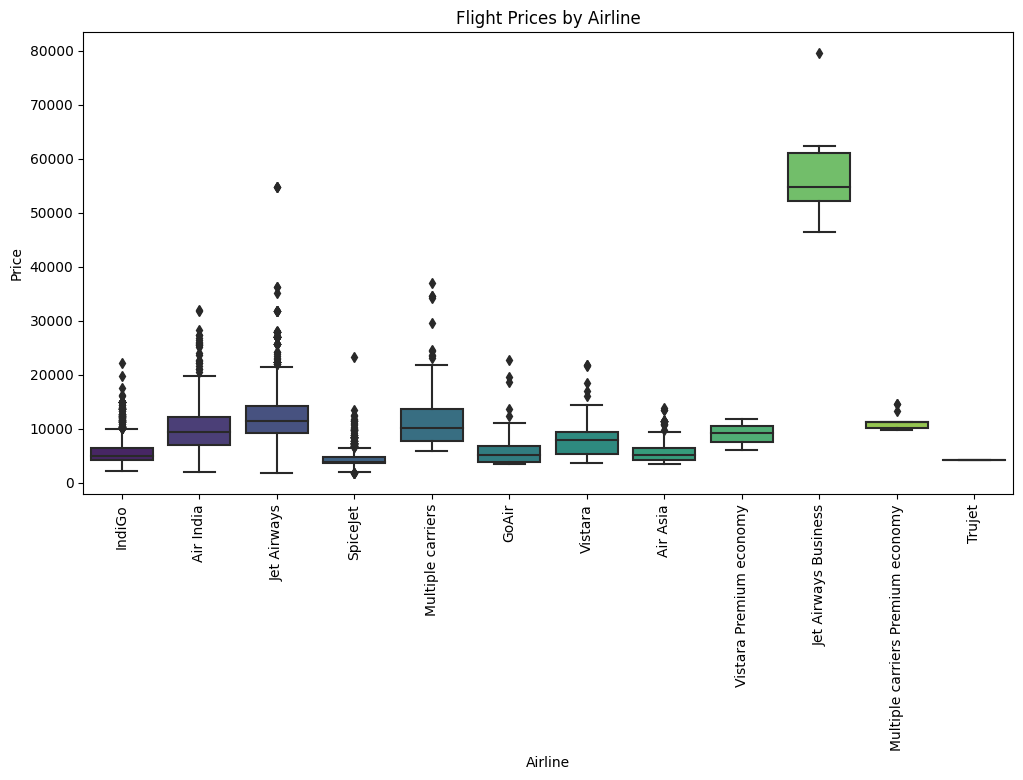

In [7]:
# Create a boxplot to compare prices by airline
plt.figure(figsize=(12, 6))  # Set the figure size

sns.boxplot(data=df, x='Airline', y='Price', palette='viridis')
plt.xticks(rotation=90) 
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')

plt.show()

<p style=" color : #4233FF"><b>Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.</b></p>


In [8]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

df.drop('Date_of_Journey',axis=1,inplace=True)

df['Arrival_hours']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time',axis=1,inplace=True)

df['Arrival_hours']=df['Arrival_hours'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

df['Dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dept_min']=df['Dep_Time'].str.split(':').str[1]
df['Dept_hour']=df['Dept_hour'].astype(int)
df['Dept_min']=df['Dept_min'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)

df.drop('Route',axis=1,inplace=True)

df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration'].str.split(' ').str[1].str.split('h').str[0]

df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

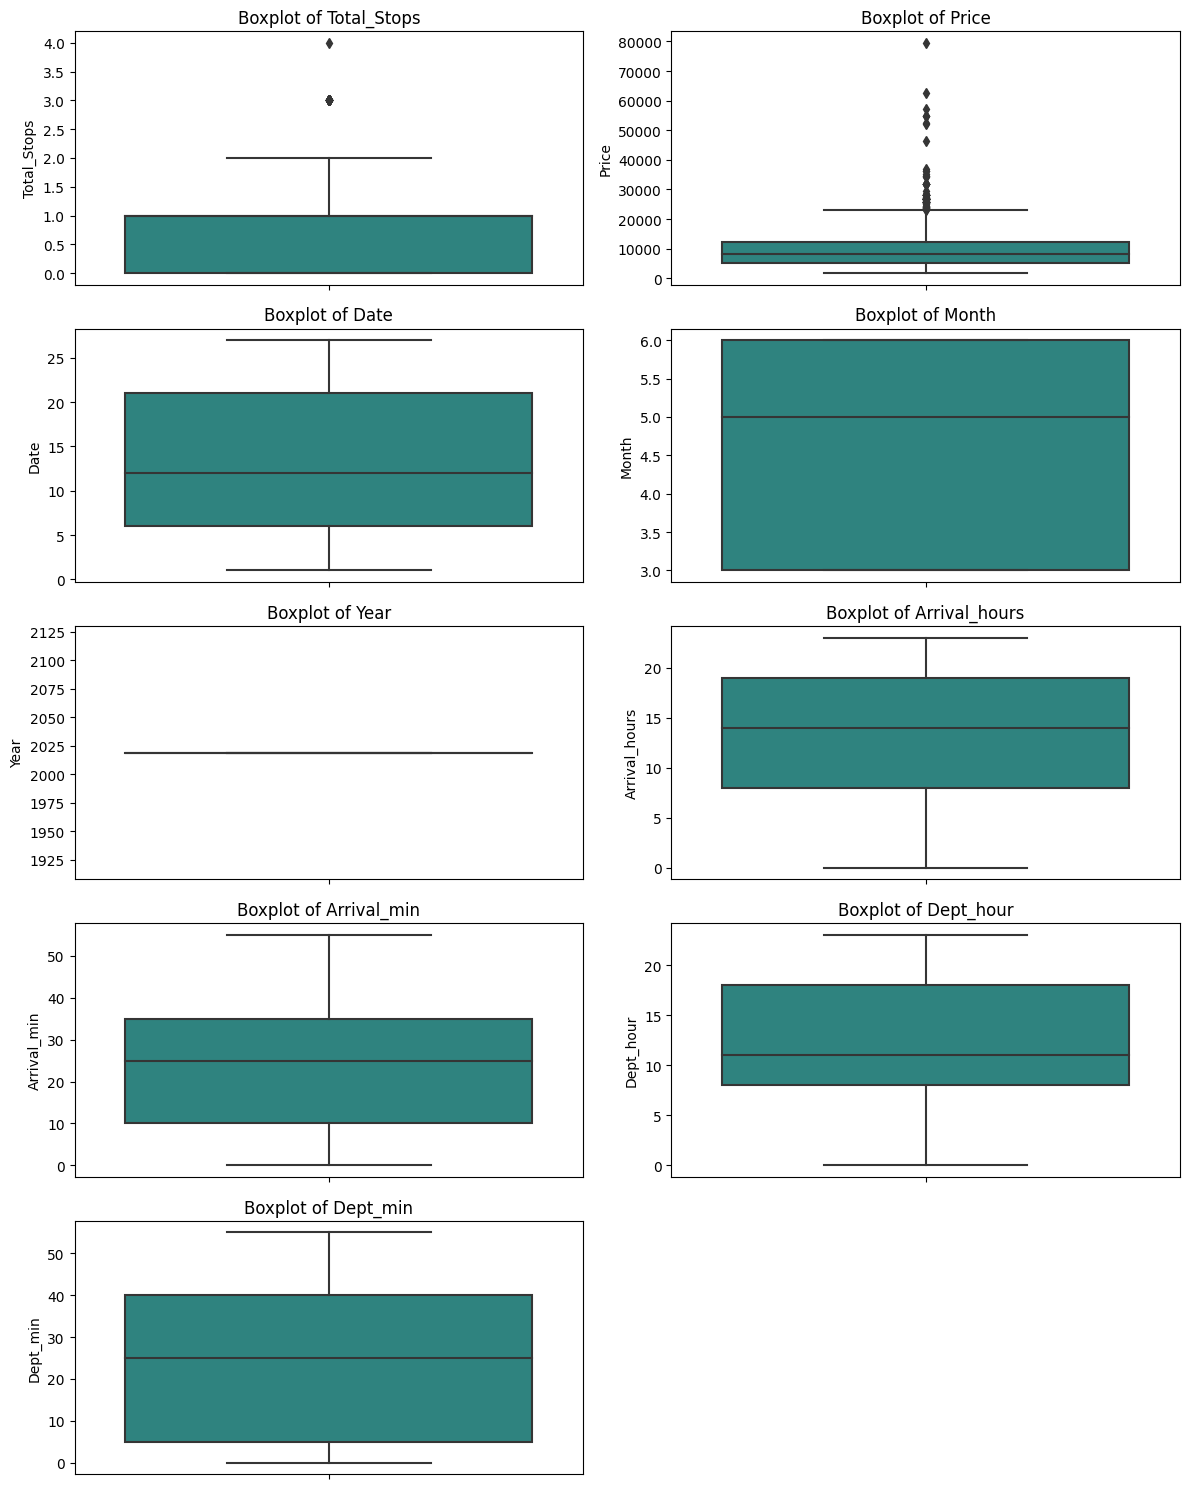

In [9]:
#  Select numerical columns for boxplots
numerical_columns = df.select_dtypes(include=['int32','int64', 'float64'])

# Create subplots with 2 columns
fig, axes = plt.subplots(nrows=numerical_columns.shape[1] // 2 + 1, ncols=2, figsize=(12, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through each numerical column for boxplots
for i, column in enumerate(numerical_columns.columns):
    # Calculate subplot position
    row = i // 2
    col = i % 2

    # Create a boxplot for the current numerical column
    sns.boxplot(data=df, y=column, ax=axes[row, col], palette='viridis')
    axes[row, col].set_title(f'Boxplot of {column}')
    axes[row, col].set_ylabel(column)

# Remove empty subplots
if numerical_columns.shape[1] % 2 != 0:
    fig.delaxes(axes[row, col+1])

plt.tight_layout()
plt.show()


> Total_Stops Outliers:

- Outliers in the "Total_Stops" column, which likely represent flights with an unusually high number of stops, can affect our analysis if not handled properly.
- Impact on Descriptive Statistics: Outliers can significantly influence summary statistics like the mean and standard deviation. For example, if there are very few flights with a high number of stops, the mean may be skewed higher than the typical flight.
- Impact on Modeling: Outliers in the "Total_Stops" column can affect machine learning models that rely on this feature. For instance, models like linear regression may be sensitive to extreme values and may produce biased results.

> Price Outliers:

- Outliers in the "Price" column can have a substantial impact on our analysis, particularly in a pricing context.
- Pricing Decisions: Outliers in prices may reflect rare or unusual conditions, such as pricing errors, special promotions, or extremely luxurious flights. These outliers might not be representative of regular pricing and could lead to incorrect pricing decisions if not properly identified and handled.
- Impact on Price Analysis: When conducting price analysis or market research, extreme prices can distort the overall picture. For example, calculating the average price with outliers included may not accurately represent the typical price that customers pay.
- Impact on Prediction Models: In predictive modeling tasks, such as predicting flight prices, outliers can lead to inaccuracies in model predictions. Models may struggle to generalize well to extreme price values.

<p style=" color : #4233FF"><b>Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?</b>
</p>

To identify the peak travel season using the Flight Price dataset, we would typically analyze the following features:

1. **Date_of_Journey:** This feature provides the date when the flight was booked. Analyzing the distribution of flight bookings over different months or seasons can reveal when the peak travel season occurs.

2. **Month:** We can extract the month from the "Date_of_Journey" and use it as a separate feature. This makes it easier to analyze monthly patterns.

3. **Price:** This feature is essential for understanding how flight prices vary over time. We can analyze the average prices for different months or seasons to identify price spikes during peak travel periods.

4. **Total_Stops:** The number of stops in a flight can also impact travel demand. People might prefer non-stop or direct flights during peak seasons, which can affect prices and availability.

5. **Airline:** Different airlines may have different peak seasons based on their routes and customer preferences. Analyzing flight bookings by airline can provide insights into their individual peak periods.

> Here's a step-by-step approach to analyzing these features and presenting our findings:

**Step 1: Data Preparation**
   - Preprocess the "Date_of_Journey" column to extract the month and create a new "Month" column.
   - Ensure that the "Price" column is in a numeric format.

**Step 2: Data Analysis**
   - Calculate the average flight prices for each month and visualize the results using line plots or bar charts. This will help identify when prices are highest.
   - Examine the distribution of flight bookings over different months to pinpoint peak travel months.
   - Explore whether there is a correlation between the number of stops ("Total_Stops") and prices during peak seasons.

**Step 3: Identify Peak Season**
   - Based on our analysis, determine which month(s) or season(s) have the highest average flight prices and the highest number of flight bookings.
   - Define the peak travel season(s) based on our findings.

**Step 4: Presentation**
   - Prepare a report or presentation for boss, summarizing our findings.
   - Use visualizations such as line charts or bar graphs to illustrate the monthly variation in flight prices and bookings.
   - Highlight the specific month(s) identified as the peak travel season(s).
   - Provide insights into why these months are considered peak seasons, considering factors like holidays, weather, or special events.
   - Recommend strategies for the travel agency to take advantage of the peak season, such as marketing promotions or adjusting pricing strategies.

By analyzing these features and presenting our findings effectively, we can help our travel agency make informed decisions and optimize its operations during peak travel seasons.

<p style=" color : #4233FF"><b>Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?</b>
</p>

### `Airline` VS `Price`

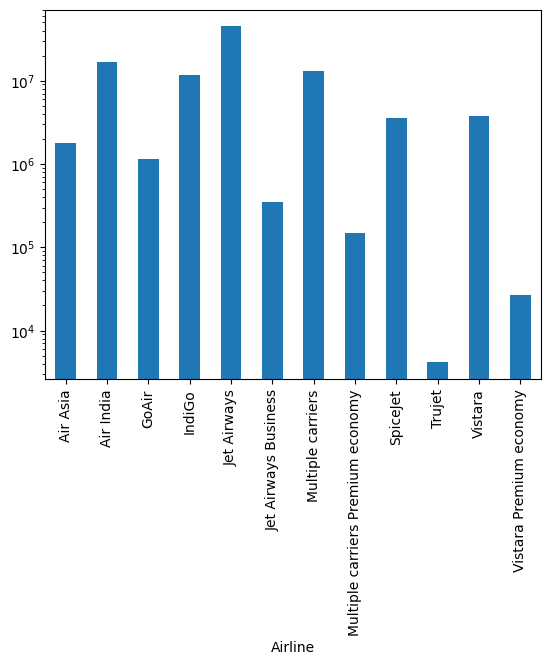

In [10]:
df.groupby(['Airline'])['Price'].sum().plot(kind = 'bar',logy=True)
plt.show()

### `Source` VS `Price`

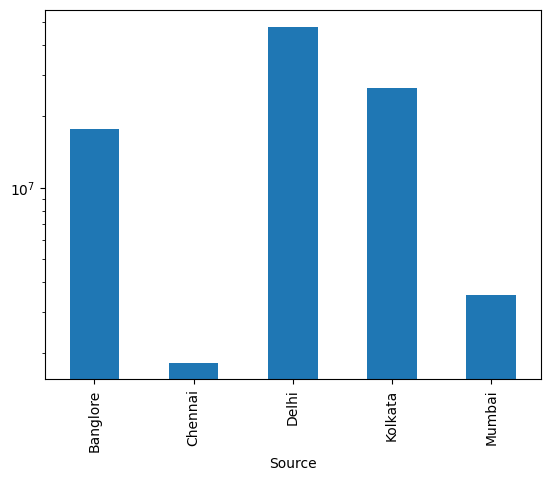

In [11]:
df.groupby(['Source'])['Price'].sum().plot(kind = 'bar',logy=True)
plt.show()

### `Destination` VS `Price`

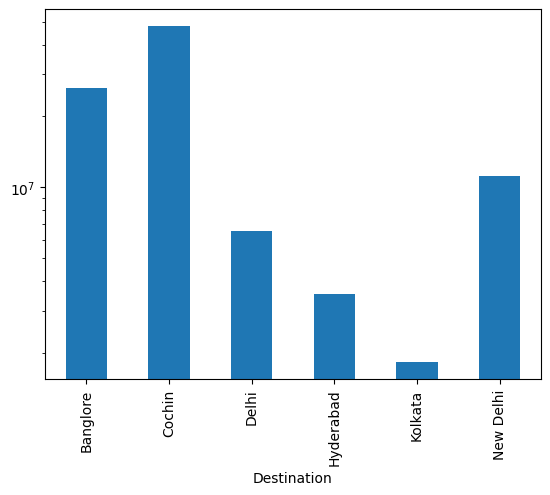

In [12]:
df.groupby(['Destination'])['Price'].sum().plot(kind = 'bar',logy=True)
plt.show()

### `Month` VS `Price`

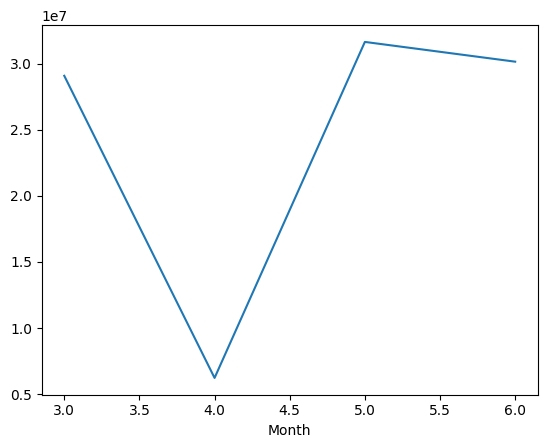

In [13]:
df.groupby(['Month'])['Price'].sum().plot(kind = 'line')
plt.show()

<p style=" color : #4233FF"><b>Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?</b>
</p>

As a data scientist working for an airline company, analyzing the Flight Price dataset to identify the factors that affect flight prices is crucial for optimizing pricing strategies and improving decision-making. Here's how we can approach this analysis and present our findings to the management team:

**Features to Analyze:**

1. **Date_of_Journey:** Analyze how flight prices vary with the date of booking. Consider seasonality, day of the week, and month effects.

2. **Airline:** Investigate how different airlines price their flights. Identify which airlines tend to offer lower or higher prices.

3. **Source and Destination:** Study the impact of the origin and destination cities on flight prices. Determine which routes are more expensive or popular.

4. **Total_Stops:** Explore how the number of stops affects prices. Analyze differences in prices between non-stop, one-stop, and multi-stop flights.

5. **Additional_Info:** Examine the influence of additional information, such as in-flight services, on prices.

6. **Duration:** Investigate whether flight duration has an impact on prices. Longer flights may be priced differently.

7. **Source and Destination Airports:** Consider specific airports within source and destination cities. Some airports may have higher landing fees or operating costs.

8. **Time of Day:** Analyze flight prices based on the time of departure. Red-eye flights or flights during peak hours may have different pricing.

9. **Competition:** Research competitors' pricing strategies and market presence. Competitive pricing can be a significant factor.

**Analysis Approach:**

1. **Exploratory Data Analysis (EDA):** Begin with EDA to understand data distributions, correlations, and initial insights. Use summary statistics, histograms, box plots, and scatter plots to visualize and explore the data.

2. **Feature Engineering:** Create new features if needed, such as day of the week, month, or season from the 'Date_of_Journey' feature. Encode categorical variables like airlines and source-destination pairs.

3. **Correlation Analysis:** Calculate correlations between numerical features and flight prices. Identify which features are most strongly correlated with prices.

4. **Statistical Testing:** Perform statistical tests, such as t-tests or ANOVA, to determine if there are significant price differences across categories (e.g., airlines, source-destination pairs).

5. **Machine Learning Models:** Train predictive models, such as regression or random forests, to quantify the impact of various features on flight prices. Feature importance scores can provide insights.

6. **Visualization:** Create informative visualizations, including scatterplots, bar charts, and regression plots, to illustrate relationships between features and prices.

**Presenting Findings:**

> When presenting our findings to the management team:

1. **Executive Summary:** Begin with a concise executive summary highlighting key findings and their business implications.

2. **Visualizations:** Use impactful visualizations to illustrate trends and relationships. Highlight any significant findings, such as the most influential factors affecting prices.

3. **Recommendations:** Provide actionable recommendations based on our analysis. For example, suggest pricing adjustments, route expansions, or marketing strategies.

4. **Data-Driven Insights:** Emphasize the importance of data-driven decision-making and how the analysis can help optimize pricing strategies and improve competitiveness.

5. **Interactive Dashboards:** Consider creating interactive dashboards that allow management to explore data and scenarios themselves.

6. **Questions and Discussion:** Be prepared to answer questions and engage in a discussion with the management team regarding the analysis and its implications.

7. **Next Steps:** Outline potential next steps, such as further analysis, A/B testing, or implementing pricing strategies based on our recommendations.

Remember to tailor our presentation to the audience's level of technical expertise and focus on actionable insights that can drive improvements in pricing and revenue management.

> Google Playstore:

<p style=" color : #4233FF"><b>Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?</b>
</p>

In [14]:
df=pd.read_csv(r"D:\DataBox\pw\Google Playstore.csv")
df.shape

(10841, 13)

<p style=" color : #4233FF"><b>Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.</b>
</p>

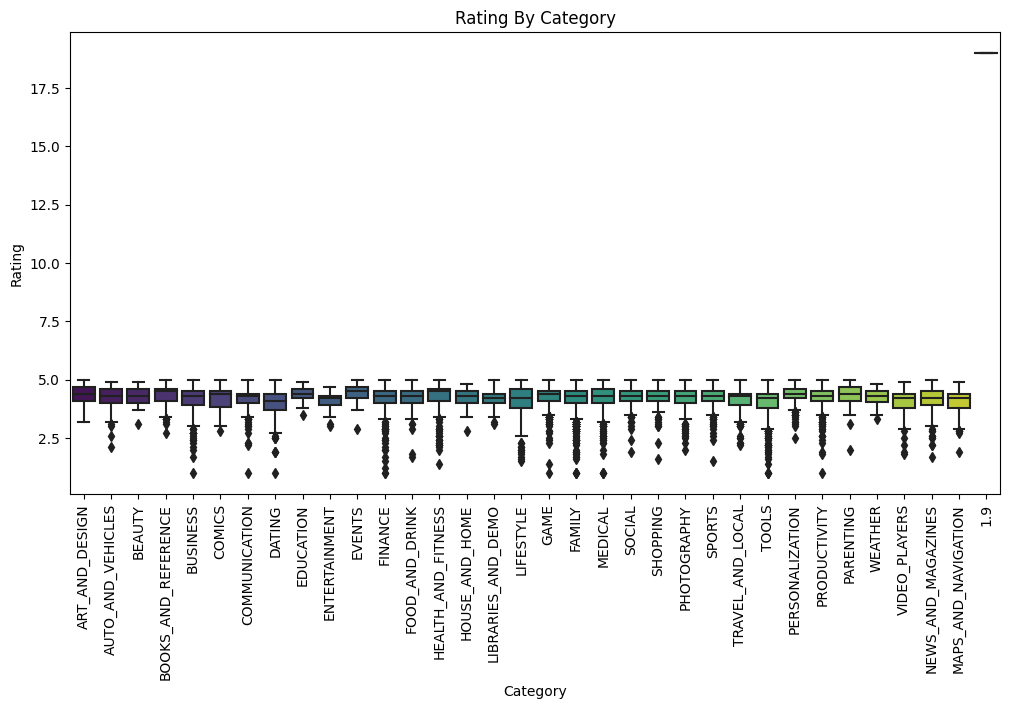

In [15]:
# Create a boxplot to compare prices by airline
plt.figure(figsize=(12, 6))  # Set the figure size

sns.boxplot(data=df, x='Category', y='Rating', palette='viridis')
plt.xticks(rotation=90) 
plt.title('Rating By Category')
plt.xlabel('Category')
plt.ylabel('Rating')

plt.show()

<p style=" color : #4233FF"><b>Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.</b>
</p>

In [16]:
100*(df.isnull().sum() / df.shape[0] ).sort_values(ascending=False)

Rating            13.596532
Current Ver        0.073794
Android Ver        0.027673
Type               0.009224
Content Rating     0.009224
App                0.000000
Category           0.000000
Reviews            0.000000
Size               0.000000
Installs           0.000000
Price              0.000000
Genres             0.000000
Last Updated       0.000000
dtype: float64

> Rating, Current Ver, Android Ver, Type, Content Rating have null values

- They need imputation on the basis of the datatype

<p style=" color : #4233FF"><b>Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.</b>
</p>

In [17]:
def change_dtype(x):
    try:
        return int(x)
    except:
        if 'M' in x:
            return int(float(x[:-1]))  

df['Reviews'] = df['Reviews'].apply(change_dtype)

def is_numeric(x):
    try:
        int(x)
        return True
    except ValueError:
        return False

# Create a boolean mask for numeric values
mask = df['Reviews'].apply(is_numeric)

# Count the numeric values
numeric_count = mask.sum()

print(numeric_count)


def convert(x):
    try:
        return int(float(x))
    except:
        if 'M' in x:
            return int(float(x[:-1])) * 1000000  # Convert '3.0M' to 3000000
        elif 'k' in x or 'K' in x:
            return int(float(x[:-1])) * 1000     # Convert '500K' to 500000
        else:
            return None  # Handle other non-integer cases

df['Size'] = df['Size'].apply(convert)


def numeric(x):
    try:
        return int(float(x))
    except:
        if x.endswith('+'):
            return int(float(x[:-1]))
        elif x.startswith('$'):
            return int(float(x[1:]))
        else:
            return None

df['Price'] = df['Price'].apply(numeric)


def numeric(x):
    try:
        return int(float(x))
    except:
        if ',' in x or '+' in x:
            if ',' in x:
                y = x[:-1]
                a = y.split(',')[0]
                b = y.split(',')[1]
                return int(float(a+b))
            else:
                return int(float(x[:-1]))
        else:
            return None

df['Installs'] = df['Installs'].apply(numeric)


def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%B %d, %Y', errors='coerce')
    except:
        return None

df['Last Updated'] = df['Last Updated'].apply(parse_date)

# Extract day, month, and year
df['Day'] = df['Last Updated'].dt.day
df['Month'] = df['Last Updated'].dt.month
df['Year'] = df['Last Updated'].dt.year


df = df.dropna(subset=['Last Updated'])

# Reset the index if needed
df = df.reset_index(drop=True)

df=df.drop_duplicates(subset=['App'],keep='first')


flo = ['Rating', 'Size']
obj = ['Type', 'Current Ver', 'Android Ver']
for i in flo:
    med = df[i].median()
    df[i] = df[i].fillna(med)

for j in obj:
    mod = df[j].mode()[0]
    df[j] = df[j].fillna(mod)

10841


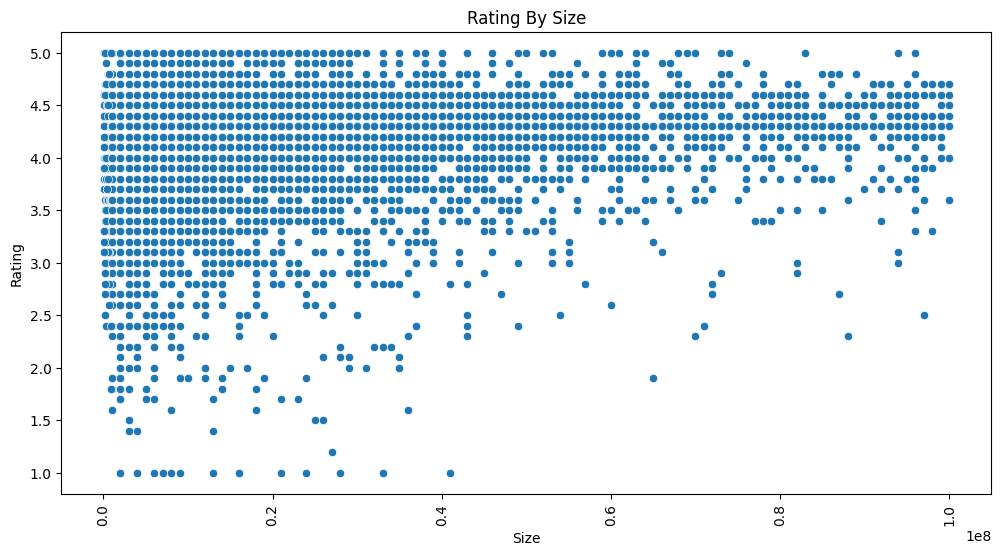

In [18]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.scatterplot(data=df, x='Size', y='Rating', palette='viridis')
plt.xticks(rotation=90) 
plt.title('Rating By Size')
plt.xlabel('Size')
plt.ylabel('Rating')

plt.show()

<p style=" color : #4233FF"><b>Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.</b>
</p>

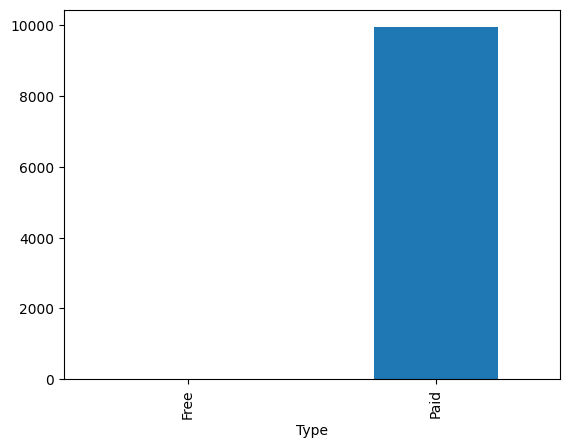

In [19]:
df.groupby(['Type'])['Price'].sum().plot(kind = 'bar')
plt.show()

<p style=" color : #4233FF"><b>Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.</b>
</p>

In [20]:
df[['App']].value_counts().sort_values(ascending=False).head(10)

App                                              
"i DT" Fútbol. Todos Somos Técnicos.                 1
1800 Contacts - Lens Store                           1
4 Paws PH                                            1
12 Step Meditations & Sober Prayers AA NA AL-ANON    1
- Free Comics - Comic Apps                           1
.R                                                   1
/u/app                                               1
058.ba                                               1
1. FC Köln App                                       1
10 Best Foods for You                                1
Name: count, dtype: int64

<p style=" color : #4233FF"><b>Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?</b>
</p>

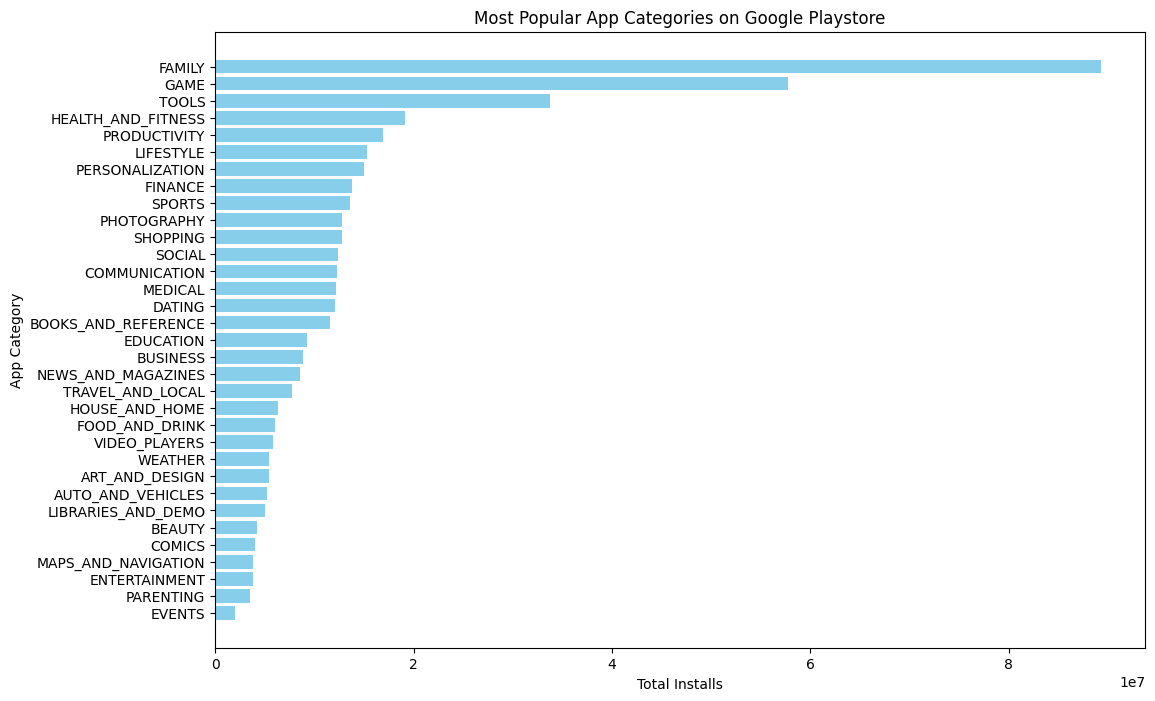

In [21]:

# Grouping and aggregation
category_popularity = df.groupby('Category')['Installs'].sum().reset_index()

# Sorting by popularity
category_popularity = category_popularity.sort_values(by='Installs', ascending=False)

# Visualization
plt.figure(figsize=(12, 8))
plt.barh(category_popularity['Category'], category_popularity['Installs'], color='skyblue')
plt.xlabel('Total Installs')
plt.ylabel('App Category')
plt.title('Most Popular App Categories on Google Playstore')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()


<p style=" color : #4233FF"><b>Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?</b>
</p>

In [22]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0


In [23]:
developer_stats = df.groupby('App').agg({
    'Rating': 'mean',
    'Reviews': 'sum',
    'Installs': 'sum'
}).reset_index().sort_values(by='Installs', ascending=False)
developer_stats

,App,Rating,Reviews,Installs
9039,Whataburger,4.5,5093,500000.0
5282,Hungry Hearts Diner: A Tale of Star-Crossed Souls,4.9,46253,500000.0
1677,Blood Donor,4.2,4476,500000.0
1675,Bloglovin',3.9,8936,500000.0
9323,ac remote control,3.7,9514,500000.0
...,...,...,...,...
9385,cronometra-br,4.3,0,0.0
2641,Command & Conquer: Rivals,4.3,0,0.0
2253,CX Network,4.3,0,0.0
8152,Sweden Newspapers,4.3,0,0.0


<Figure size 1200x600 with 0 Axes>

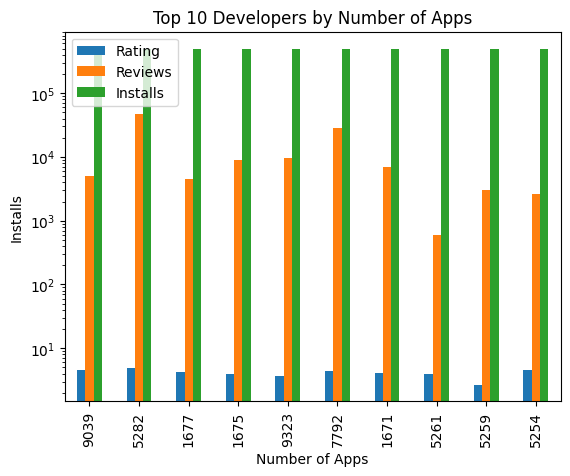

In [27]:
# Data visualization
plt.figure(figsize=(12, 6))
developer_stats.head(10).plot(kind = 'bar', logy=True)

plt.xlabel('Number of Apps')
plt.ylabel('Installs')
plt.title('Top 10 Developers by Number of Apps')
plt.show()

<p style=" color : #4233FF"><b>Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?</b>
</p>

To help a marketing research firm identify the best time to launch a new app on the Google Playstore, we can analyze various features and use data visualizations to present our findings. Here's a recommended approach:

**Features to Analyze:**
1. **Month:** Analyze the month of app releases or updates ('Month' column) to identify any trends or seasonality in app launches.
2. **Day:** Examine the day of the week ('Day' column) when apps are typically launched or updated to identify patterns.
3. **Installs:** Consider the number of installs ('Installs' column) to see if there are specific months or days when app installations are higher.
4. **Reviews:** Analyze the number of reviews ('Reviews' column) to understand user engagement over different times.
5. **Category:** Group apps by category ('Category' column) and analyze whether certain categories have specific launch trends.

**Data Visualizations:**
1. **Line Plot:** Create a line plot showing the number of app releases or updates over each month. This will help visualize monthly trends.
2. **Bar Chart:** Generate a bar chart to display the average number of installs per month or day of the week. This can highlight when users are most active.
3. **Heatmap:** Create a heatmap to explore correlations between app launches and factors like installs and reviews.
4. **Category-wise Analysis:** Perform category-wise analysis by creating bar charts or line plots for each app category to identify category-specific launch patterns.
5. **Seasonal Decomposition:** Apply seasonal decomposition techniques (e.g., seasonal decomposition of time series) to identify seasonal patterns and trends.

Here's a Python code example to get our started:


This code will help us analyze the best time to launch a new app on the Google Playstore by examining patterns and trends in the dataset.

In [28]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0


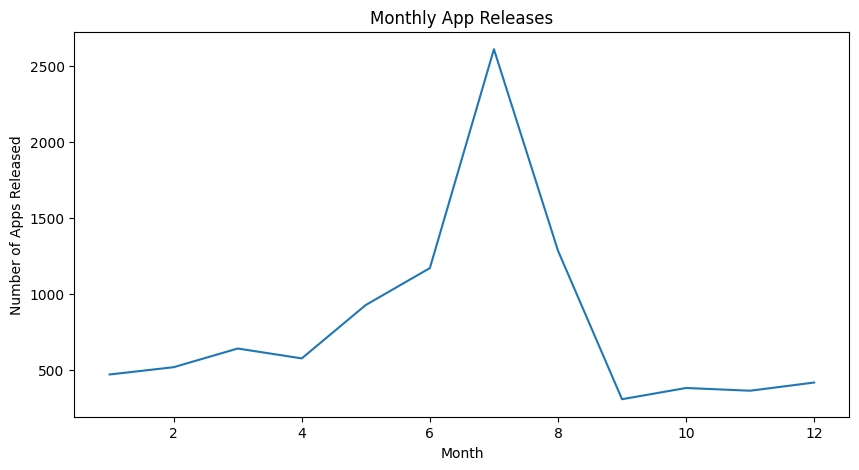

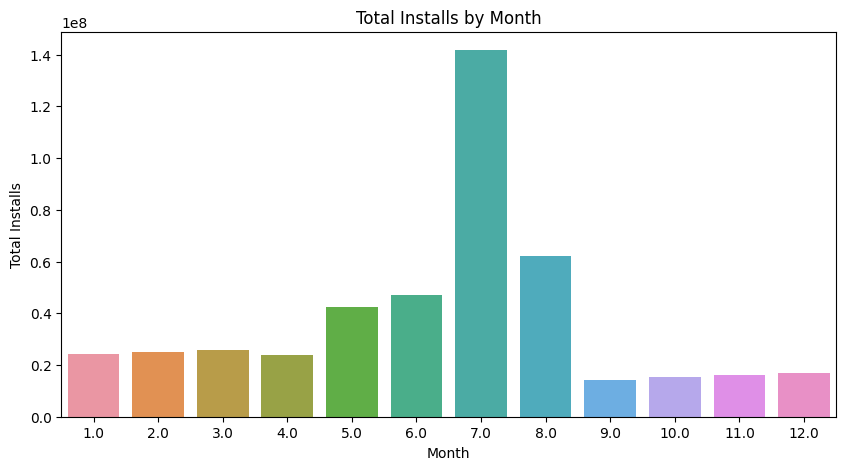

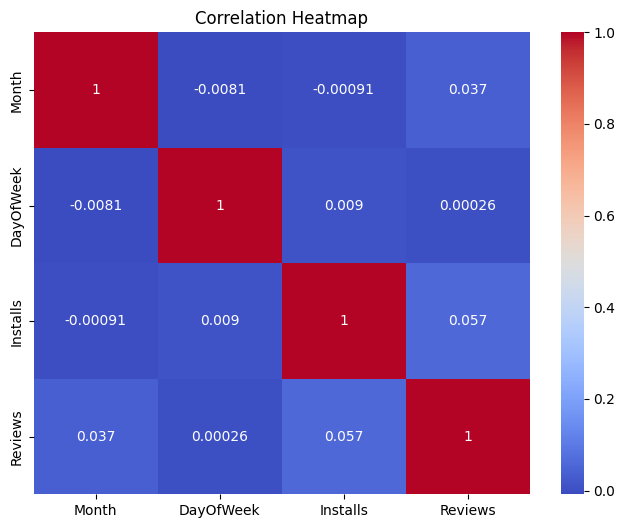

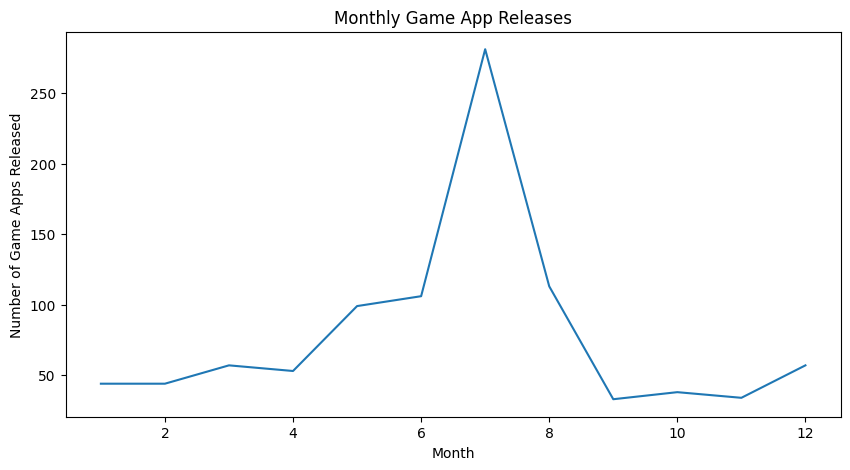

In [30]:

df['DayOfWeek'] = df['Last Updated'].dt.dayofweek

# Data visualization
# Line plot for monthly app releases
monthly_counts = df.groupby('Month').size()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title('Monthly App Releases')
plt.xlabel('Month')
plt.ylabel('Number of Apps Released')
plt.show()

# Bar chart for installs by month
monthly_installs = df.groupby('Month')['Installs'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_installs.index, y=monthly_installs.values)
plt.title('Total Installs by Month')
plt.xlabel('Month')
plt.ylabel('Total Installs')
plt.show()

# Heatmap for correlations
correlation_matrix = df[['Month', 'DayOfWeek', 'Installs', 'Reviews']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Category-wise analysis (you can choose a specific category)
category_counts = df[df['Category'] == 'GAME'].groupby('Month').size()
plt.figure(figsize=(10, 5))
sns.lineplot(x=category_counts.index, y=category_counts.values)
plt.title('Monthly Game App Releases')
plt.xlabel('Month')
plt.ylabel('Number of Game Apps Released')
plt.show()

<h1 style = 'color:orange'>
    <b><div>🙏🙏🙏🙏🙏       THANK YOU        🙏🙏🙏🙏🙏</div></b>
</h1>
